<a href="https://www.kaggle.com/code/aleksandrmorozov123/computer-vision-with-tensorflow-and-keras?scriptVersionId=171387734" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Get the data**

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

2024-04-10 17:26:38.145415: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 17:26:38.145504: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 17:26:38.260206: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Exploring the data**

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape

(60000, 28, 28)

In [4]:
len (train_labels)

60000

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len (test_labels)

10000

**Preprocess the data**

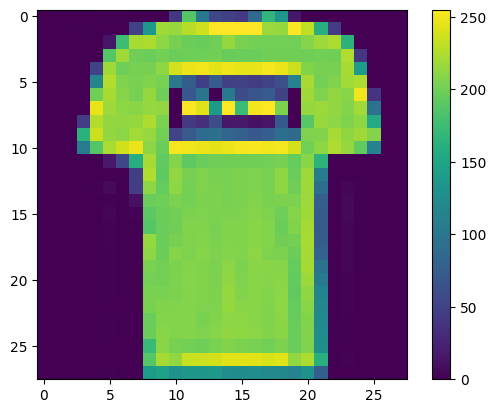

In [8]:
plt.figure ()
plt.imshow (train_images [1])
plt.colorbar ()
plt.grid (False)
plt.show ()

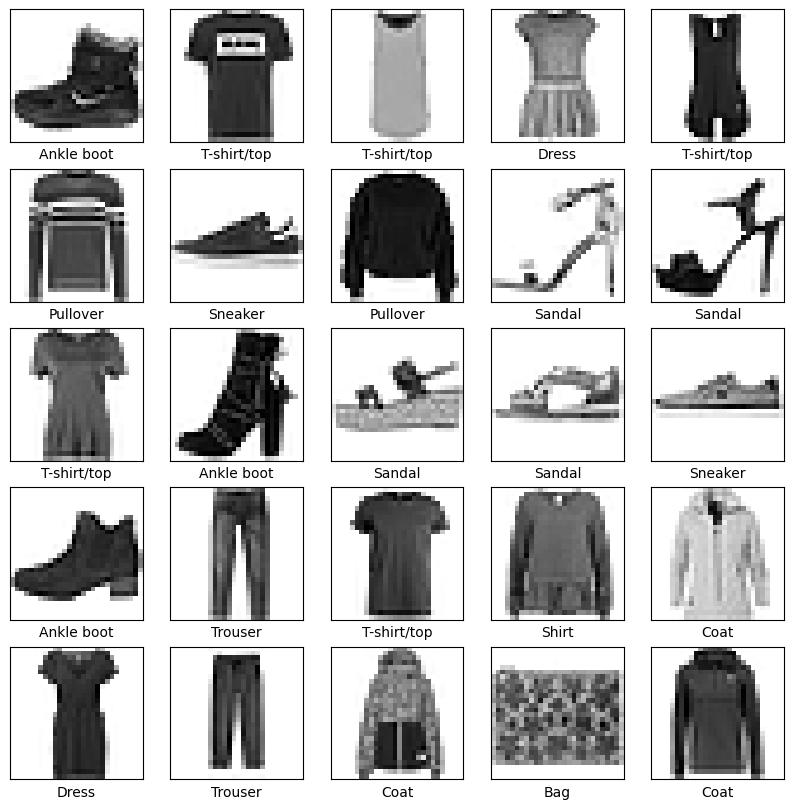

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure (figsize = (10, 10))
for i in range (25):
    plt.subplot (5, 5, i + 1)
    plt.xticks ([])
    plt.yticks ([])
    plt.grid (False)
    plt.imshow (train_images [i], cmap = plt.cm.binary)
    plt.xlabel (class_names [train_labels [i]])
plt.show ()

**Build the model**

In [10]:
model = tf.keras.Sequential ([
    tf.keras.layers.Flatten (input_shape = (28, 28)),
    tf.keras.layers.Dense (128, activation = 'relu'),
    tf.keras.layers.Dense (10, activation = 'softmax')
])
model.compile (optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary ()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Feed the model**

In [11]:
model.fit (train_images, train_labels, epochs = 20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6874 - loss: 0.9814
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8196 - loss: 0.5296
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8359 - loss: 0.4777
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8467 - loss: 0.4463
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8515 - loss: 0.4296
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8573 - loss: 0.4150
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8597 - loss: 0.4059
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8623 - loss: 0.3992
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8659 - loss: 0.3833
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8702 - loss: 0.3761
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8722 - loss: 0.3673
Epoch 12/20
1875/1875 ━━━━━━━━

**Evaluate accuracy**

In [12]:
test_loss, test_acc = model.evaluate (test_images, test_labels, verbose = 2)
print ('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8614 - loss: 0.3854

Test accuracy: 0.8614000082015991


**Make predictions**

In [13]:
probability_model = tf.keras.Sequential ([model, tf.keras.layers.Softmax ()])
predictions = probability_model.predict (test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step


In [14]:
predictions [1]

array([0.08572166, 0.08571213, 0.22591172, 0.08571222, 0.08591892,
       0.08571212, 0.08817446, 0.08571212, 0.08571253, 0.08571212],
      dtype=float32)

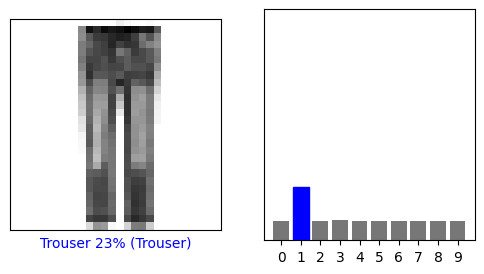

In [15]:
# define functions to graph the full set of 10 class predictions
def plot_image (i, predictions_array, true_label, img):
    true_label, img = true_label [i], img [i]
    plt.grid (False)
    plt.xticks ([])
    plt.yticks ([])
    
    plt.imshow (img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax (predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel ("{} {:2.0f}% ({})".format (class_names [predicted_label],
                                          100 * np.max (predictions_array),
                                          class_names [true_label]),
                                          color = color)
    
def plot_value_array (i, predictions_array, true_label):
    true_label = true_label [i]
    plt.grid (False)
    plt.xticks (range (10))
    plt.yticks ([])
    thisplot = plt.bar (range (10), predictions_array, color = '#777777')
    plt.ylim ([0, 1])
    predicted_label = np.argmax (predictions_array)
    
    thisplot [predicted_label].set_color ('red')
    thisplot [true_label].set_color ('blue')
    
# verify predictions
i = 15
plt.figure (figsize = (6, 3))
plt.subplot (1, 2, 1)
plot_image (i, predictions [i], test_labels, test_images)
plt.subplot (1, 2, 2)
plot_value_array (i, predictions [i], test_labels)
plt.show ()

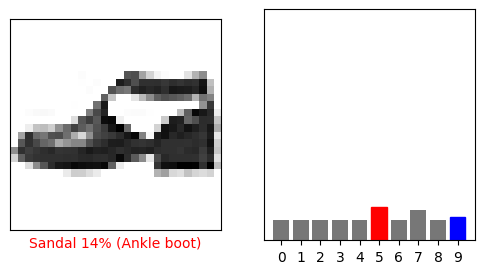

In [16]:
i = 23
plt.figure (figsize = (6, 3))
plt.subplot (1, 2, 1)
plot_image (i, predictions [i], test_labels, test_images)
plt.subplot (1, 2, 2)
plot_value_array (i, predictions [i], test_labels)
plt.show ()

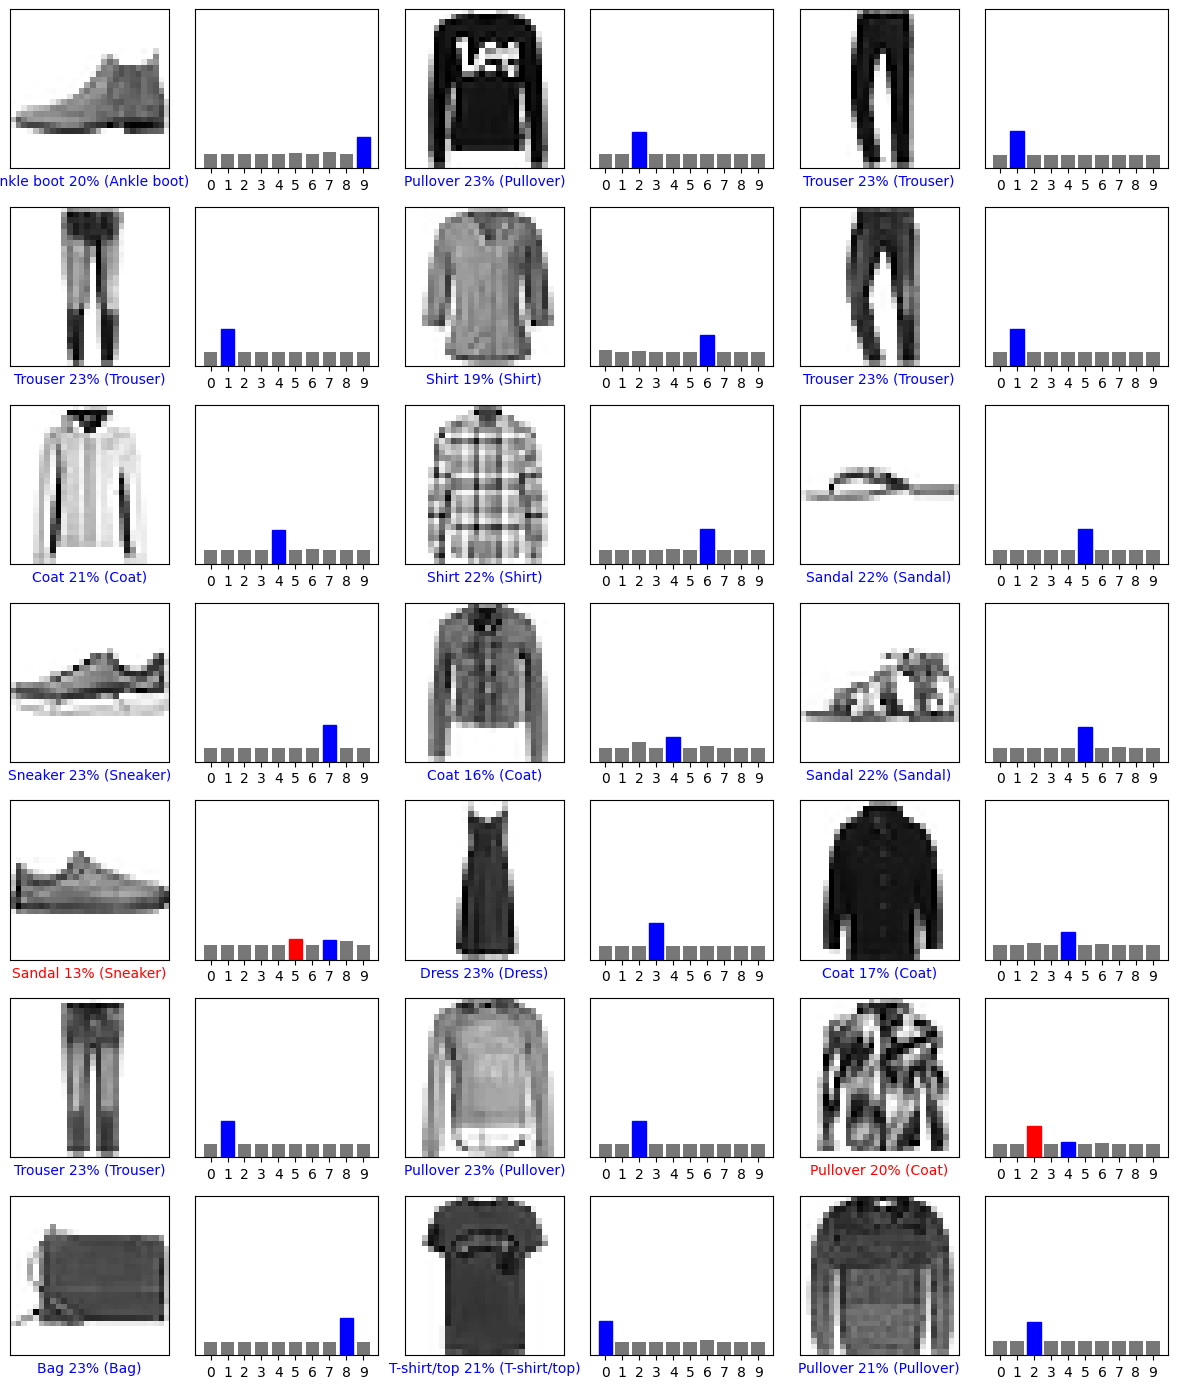

In [17]:
# plot the first X test images, their predicted labels and the true labels
# color correct predictions in blue and incorrect predictions in red
num_rows = 7
num_cols = 3
num_images = num_rows * num_cols
plt.figure (figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range (num_images):
    plt.subplot (num_rows, 2 * num_cols, 2 * i + 1)
    plot_image (i, predictions [i], test_labels, test_images)
    plt.subplot (num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array (i, predictions [i], test_labels)
    
plt.tight_layout ()
plt.show ()